In [3]:
import torch

import numpy as np
import pandas as pd

from IPython.display import Image

# 1: Basics

## 1.1: Tensors

In [4]:
# Creating tensors, operating it and particularities

## Empty tensor
# x = torch.empty(1) # 1-D empty tensor
# x = torch.empty(2, 1) # 2-D empty tensor
# x = torch.empty(n-dimensional tensor) # n-D empty tensor

## Zeros tensor
# x = torch.zeros(1) # 1-D zeros tensor

## Ones tensor
# x = torch.ones(1) # 1-D ones tensor

## Defining type
# x = torch.ones(2,2, dtype=torch.float16)
# print(x.dtype)

## Retrieving tensor size
# print(x.size())

## Creating tensor "from scratch"
# x = torch.tensor([[2.5, 5], [1.7, 8]])

## Operations
x = torch.rand(2, 2)
y = torch.rand(2, 2)

### Arithmetic
# z = x+y # Element-wise addition
# z = torch.add(x,y) # Same result
# y.add_(x) # Inplace element-wise addition; functions if "_" before its name make inplace ops

# z = x-y # Element-wise subtraction
# z = torch.sub(x, y) # Analogous as above
# y.sub_(x) # Analogous as above

# z = x*y # Element-wise multiplication
# z = torch.mul(x, y) # Analogous as above
# y.mul_(x) # Analogous as above

# z = x / y # Element-wise division
# z = torch.div(x, y) # Analogous as above
# y.div_(x) # Analogous as above

### Slicing
# z = x[:, 1]
# z = x[1, 1]

### Reshaping
# z = x.view(4)
# z = x.view(-1, 2)

### Casting to numpy arrays
# z = x.numpy()

### Casting from numpy arrays to pytorch tensors
# z = np.array([[1, 3.4], [5, 8.9]])
# w = torch.from_numpy(z)

### Working on GPU
# if torch.cuda_is_available():
#     gpu = torch.device("cuda")
#     x = torch.ones(1, 2, device=gpu) # Tensor allocated on GPU
#     y = torch.ones(5) # Tensor allocated on CPU
#     y = y.to(gpu) # Sending tensor instantiated on CPU to GPU

### Observation
#################################################################################
#    When dealing with tensors that it'll be needed to compute its gradients    #
#    (e.g in optimization), Pytorch requires defining it explicitly.            #
#################################################################################
# x = torch.ones(4, requires_grad=True) # requires_grad argument is False by default

## 1.2: Autograd

Autograd's package: used to ease the calculation of gradients. Its principle is based on Automatic Differentiation (autodiff)
which is a general method for automatically computing the derivative of a value. For more details, I highly recommend checking out
Prof. Roger Grosse lecture's slides¹ about the technique and the following medium post² about Pytorch's implementation of it.

1: https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/slides/lec10.pdf <br>
2: https://mustafaghali11.medium.com/how-pytorch-backward-function-works-55669b3b7c62

In [63]:
# First, let's create an input tensor
x = torch.rand(3, requires_grad=True) # Remember that it's necessary to enable requires_grad property

# After creating the input tensor, let's define
# an operation over this tensor.
y = 3*x+2 # Creates the computational graph

**Computational graph created after operating over the tensor**

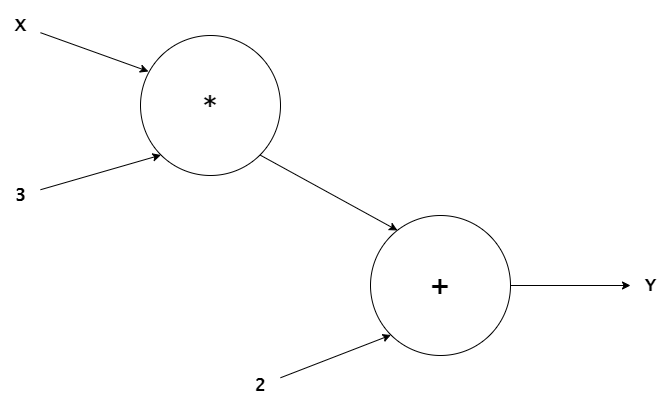

In [10]:
Image(filename="assets/images/compt_graph.png")

In [67]:
print("X:", x)
print("Y:", y)

X: tensor([0.1130, 0.4408, 0.1186], requires_grad=True)
Y: tensor([2.3389, 3.3224, 2.3559], grad_fn=<AddBackward0>)


As seen, tensor X has requires_grad property set as **True** and tensor Y has the last operation over X (addition) as its gradient function. 
In the next example, Z is a tensor computed multiplying Y by itself and your grad. function is the multiplication op.

In [70]:
z = y*y

print(z)

tensor([ 5.4703, 11.0381,  5.5501], grad_fn=<MulBackward0>)


In [45]:
dot_prod_vec = torch.ones(3)
z.backward(dot_prod_vec)

In [65]:
dot_prod_vec = torch.ones(3)
y.backward(dot_prod_vec)

In [66]:
print(x.grad)

tensor([3., 3., 3.])


In [59]:
x.grad.zero_()

tensor([0., 0., 0.])

In [ ]:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():